In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf

## Split the Data into Training and Testing Sets

### Read the data into a DataFrame and review it.

In [2]:
# Read the JSON file from the Resources folder into a Pandas DataFrame
file_path = Path("./Resources/loan_approval_dataset.json")
df_loan_approval = pd.read_json(file_path)

# Review the DataFrame
df_loan_approval.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Drop the non-beneficial ID column
df_loan_approval.drop(columns=["Id"],inplace=True)
df_loan_approval.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [32]:
df_loan_approval['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [34]:
df_loan_approval['Risk_Flag'].replace(0,"Non-risky",inplace=True)
df_loan_approval['Risk_Flag'].replace(1,"Risky",inplace=True)
df_loan_approval['Risk_Flag'].value_counts()

Risk_Flag
Non-risky    221004
Risky         30996
Name: count, dtype: int64

In [35]:
df_loan_approval.to_csv(path_or_buf="./Resources/loan_approval_dataset.csv", index=False)

In [4]:
# Determine the number of unique values in each column
df_loan_approval.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

In [5]:
# Display Dataframe info
df_loan_approval.info()
print("\nCheck for duplicates:\n",df_loan_approval.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB

Check for duplicates:
 True     208810
False     43190
Name: count, dtype: int64


In [6]:
# Convert categorical data to numeric with `pd.get_dummies`
df_loan_approval_dummies = pd.merge(df_loan_approval.drop(columns=["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]), pd.get_dummies(df_loan_approval[["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]]), how="inner",left_index=True,right_index=True)
df_loan_approval_dummies.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,3,13,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,9,13,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,4,10,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,2,12,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,3,14,1,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Separate the data into labels and features.

In [7]:
# Separate the y variable, the labels
y = df_loan_approval_dummies['Risk_Flag']

# Separate the X variable, the features
X = df_loan_approval_dummies.drop(columns=['Risk_Flag']).values

In [24]:
# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,train_size=0.85)

In [25]:
# Create a StandardScaler instances
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=90, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\rmt20\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 200)            │        82,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 90)             │        18,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,181 (391.33 KB)

 Trainable params: 100,181 (391.33 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8795 - loss: 0.3358
Epoch 2/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8973 - loss: 0.2283
Epoch 3/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9007 - loss: 0.2035
Epoch 4/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9042 - loss: 0.1883
Epoch 5/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9046 - loss: 0.1764
Epoch 6/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9065 - loss: 0.1701
Epoch 7/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9093 - loss: 0.1626
Epoch 8/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9111 - loss: 0.1588
Epoch 9/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9124 - loss: 0.1546
Epoch 10/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9147 - loss: 0.1519
Epoch 11/50
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9157 - loss: 0.1497
Epoch 12/50
6694/6694 

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1182/1182 - 1s - 872us/step - accuracy: 0.8841 - loss: 0.8848
Loss: 0.884772002696991, Accuracy: 0.8841269612312317


In [30]:
# Export our model to HDF5 file
nn.save("LoanRiskModel.h5", save_format='h5')

## Look at Training History Here

<Axes: >

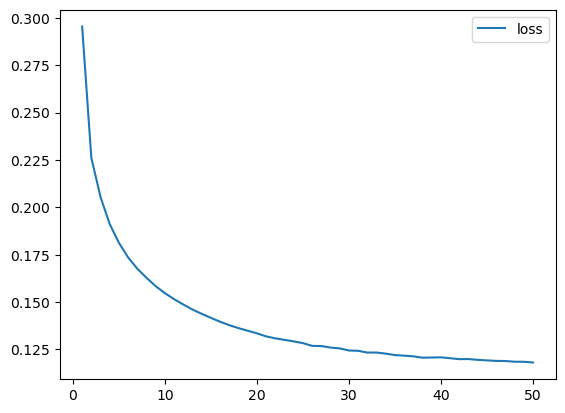

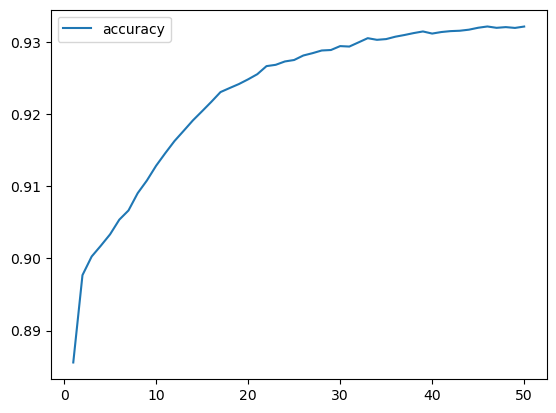

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the graphs
history_df.plot(y="loss")
history_df.plot(y="accuracy")